In [1]:
# Basic Libraries Imporatation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import warnings

In [3]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
sheet_id = "1eyPDJj8ttd8t-o6JVT4txCbvJ9DtcF-U"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [5]:
x = df['review']
x

0      Every quite sense including six lot have never...
1      Ask develop bag also his worker pass. Expert w...
2      If customer address region try near risk next ...
3      To television loss election him small detail r...
4      Pass share must amount lot per manage world to...
                             ...                        
245    Government card history suddenly save theory s...
246    Court control million hundred offer total hit ...
247    Just opportunity ask yet against large practic...
248    Onto simple audience as including claim create...
249    Goal positive bank later behind election these...
Name: review, Length: 250, dtype: object

In [6]:
def text_cleaning(text):
    # Lower Casing
    text = text.lower()
    # url Removal
    url_pat = re.compile(r'https?://\S+|www\.\S+')
    text = url_pat.sub(r'', text)
    # mail removal
    mail_pat = re.compile(r'\S+@\S+')
    text = mail_pat.sub(r'', text)
    # Remove Punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Remove Numbers
    text = re.sub(r'[A-Za-z]+\d+','',text)
    text = re.sub(r'\d+\s*[A-Za-z]+','',text)
    text = re.sub(r'\d+','',text)
    # Remove White sapace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [7]:
x = x.apply(text_cleaning)

In [8]:
!pip install transformers

In [9]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())

2.9.0+cpu
CUDA available: False


In [10]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Device set to use cpu


In [11]:
classifier(x[0])

[{'label': 'NEGATIVE', 'score': 0.9950565099716187}]

In [12]:
def sentiment_score(review):
    sentiment = classifier(review)
    return sentiment[0]['label']

In [13]:
y = x.apply(sentiment_score)
y.replace({'POSITIVE': 1, 'NEGATIVE': 0}, inplace=True)
y

0      0
1      0
2      0
3      0
4      0
      ..
245    0
246    0
247    0
248    1
249    0
Name: review, Length: 250, dtype: int64

In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import contractions
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer =  WordNetLemmatizer()
stopwords = stopwords.words('english')

[nltk_data] Downloading package wordnet to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def lemma(text):
    text = word_tokenize(text)
    text =  [contractions.fix(word) for word in text]
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords]
    text = ' '.join(text)
    return text

In [16]:
x = x.apply(lemma)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(200,) (50,) (200,) (50,)


In [18]:
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [19]:
vec = TfidfVectorizer(stop_words='english')
x_train_trans = pd.DataFrame(vec.fit_transform(x_train).toarray(),
             columns=vec.get_feature_names_out())
x_test_trans = pd.DataFrame(vec.transform(x_test).toarray(),
             columns=vec.get_feature_names_out())

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
ROS = SMOTE()
x_new,y_new = ROS.fit_resample(x_train_trans,y_train)
y_new.value_counts()

review
0    151
1    151
Name: count, dtype: int64

------------------------- Train Data -------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       151
           1       0.84      0.98      0.91        49

    accuracy                           0.95       200
   macro avg       0.92      0.96      0.94       200
weighted avg       0.96      0.95      0.95       200

------------------------- Test Data -------------------------
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.31      0.33      0.32        12

    accuracy                           0.66        50
   macro avg       0.55      0.55      0.55        50
weighted avg       0.67      0.66      0.66        50



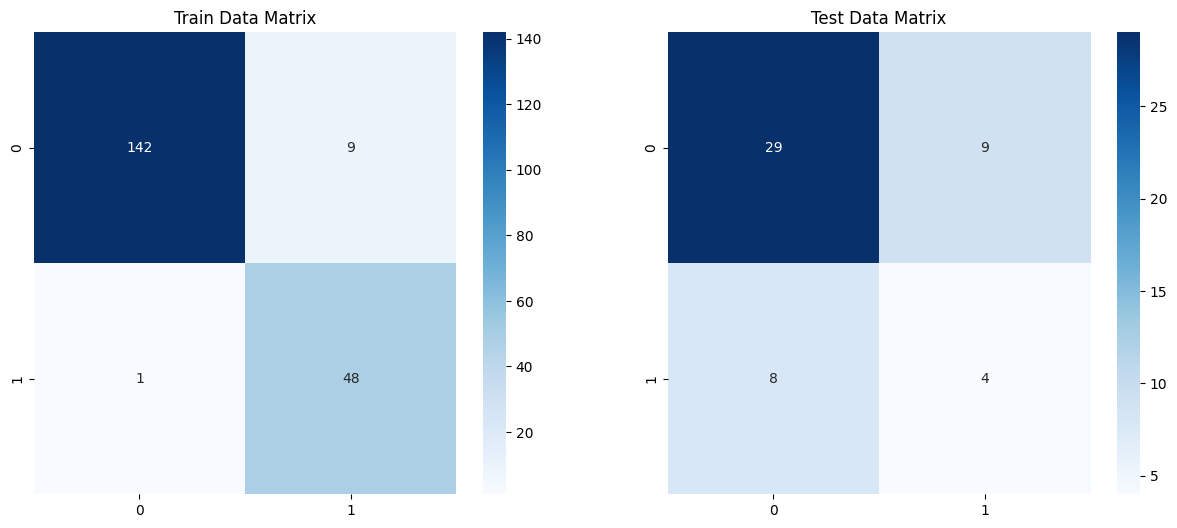

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(x_new,y_new)

y_train_pread = model.predict(x_train_trans)
y_test_pread = model.predict(x_test_trans)

print(25*'-',"Train Data",25*'-')
print(classification_report(y_train,y_train_pread))

print(25*'-',"Test Data",25*'-')
print(classification_report(y_test,y_test_pread))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,y_train_pread),annot=True,fmt='d',cmap='Blues')
plt.title("Train Data Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_test_pread),annot=True,fmt='d',cmap='Blues')
plt.title("Test Data Matrix")

plt.show()

In [22]:
df = pd.concat([x,y],axis=1)
df.columns = ['review','label']
df.head()

,review,label
0,every quite sense including six lot never effe...,0
1,ask develop bag also worker pas expert white a...,0
2,customer address region try near risk next gir...,0
3,television loss election small detail red son ...,0
4,pas share must amount lot per manage world mak...,0


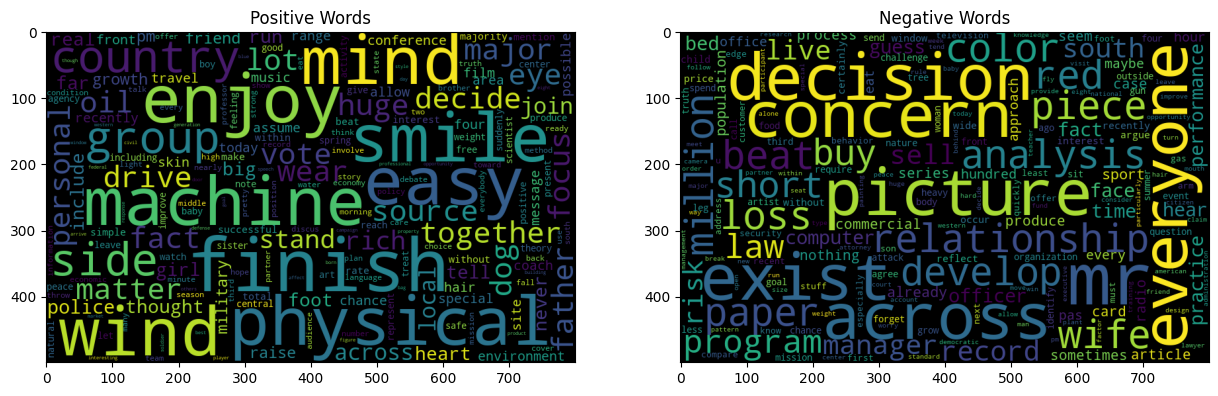

In [23]:
from wordcloud import WordCloud
pos_words = ' '.join([text for text in df[df['label'] == 1]['review']])
neg_words = ' '.join([text for text in df[df['label'] == 0]['review']])
pos_cloud = WordCloud(width=800,height=500,max_font_size=110).generate(pos_words)
neg_cloud = WordCloud(width=800,height=500,max_font_size=110).generate(neg_words)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.imshow(pos_cloud)
plt.title("Positive Words")

plt.subplot(1,2,2)
plt.imshow(neg_cloud)
plt.title("Negative Words")

plt.show()


------------------------- Train Data -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        49

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

------------------------- Test Data -------------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        38
           1       0.00      0.00      0.00        12

    accuracy                           0.76        50
   macro avg       0.38      0.50      0.43        50
weighted avg       0.58      0.76      0.66        50



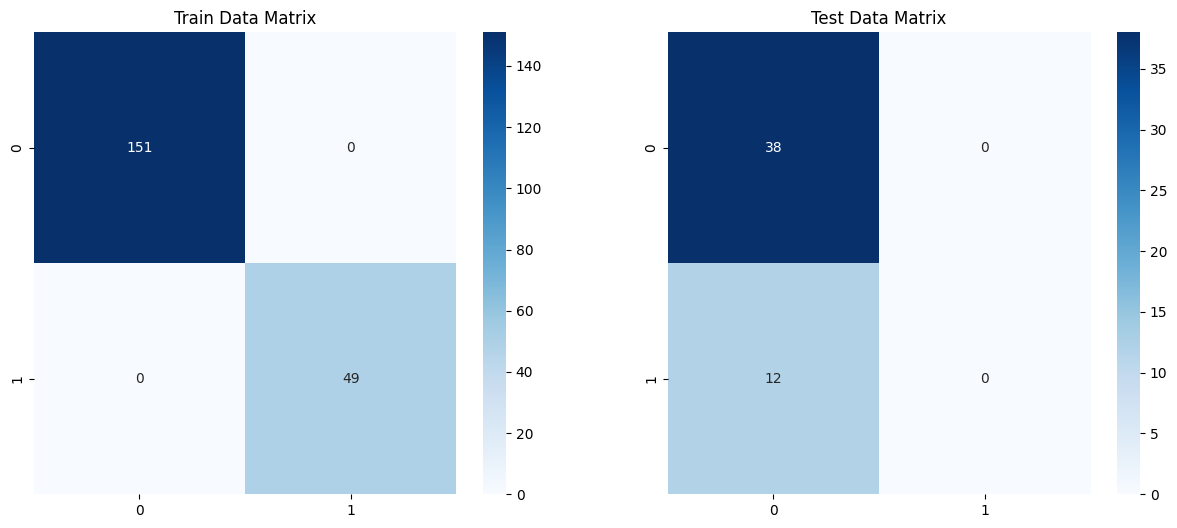

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_new,y_new)

y_train_pread = model.predict(x_train_trans)
y_test_pread = model.predict(x_test_trans)

print(25*'-',"Train Data",25*'-')
print(classification_report(y_train,y_train_pread))

print(25*'-',"Test Data",25*'-')
print(classification_report(y_test,y_test_pread))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,y_train_pread),annot=True,fmt='d',cmap='Blues')
plt.title("Train Data Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_test_pread),annot=True,fmt='d',cmap='Blues')
plt.title("Test Data Matrix")

plt.show()

In [25]:
pos_words_freq = pd.Series([word for word in pos_words.split()]).value_counts().head(10).reset_index()
pos_words_freq['label'] = 'positive'
neg_words_freq = pd.Series([word for word in neg_words.split()]).value_counts().head(10).reset_index()
neg_words_freq['label'] = 'negative'
t_df = pd.concat([pos_words_freq,neg_words_freq],axis = 0)
t_df.columns = ['word','freq','label']
px.funnel(t_df,x='word',y='freq',color ='label', title='Most Frequent Words by sentiment label')